In [1]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [2]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [3]:
feature_vec_36 = TN_utils.load_featureImg_r(1)
feature_vec_12 = TN_utils.load_featureImg_r(12)
print feature_vec_36.shape

(65536, 60, 2)


In [4]:
with gzip.open("../data/toytreerot_imgGT.npy.gz", "r") as f:
    GT_vec_array = np.load(f)
GT_vec_36 = GT_vec_array[0]
GT_vec_12 = GT_vec_array[11]

In [5]:
with gzip.open("../data/toytreerot_mask.npy.gz", "r") as f:
    mask_vec_array = np.load(f)
mask_vec_36 = mask_vec_array[0]
mask_vec_12 = mask_vec_array[11]

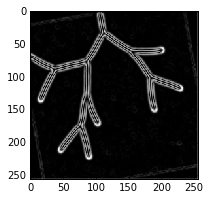

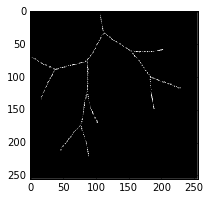

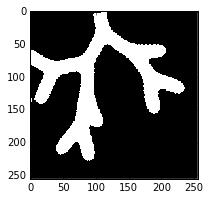

In [6]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_36, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_36, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_36.reshape((256, 256)))

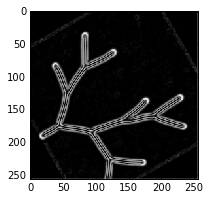

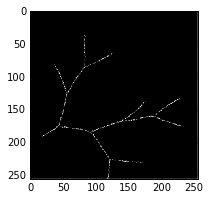

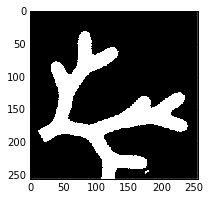

In [7]:
# V test load_toytreefeature_mat
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec_12, axis=2)[:, 12].reshape((256, 256)))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec_12, axis=1).reshape((256, 256))) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec_12.reshape((256, 256)))

In [8]:
m_feature_vec36 = feature_vec_36[mask_vec_36][:, 12:24]
m_GT_vec36 = GT_vec_36[mask_vec_36]
print m_feature_vec36.shape, m_GT_vec36.shape

(13857, 12, 2) (13857, 2)


In [9]:
m_feature_vec12 = feature_vec_12[mask_vec_12][:, 12:24]
m_GT_vec12 = GT_vec_12[mask_vec_12]
print m_feature_vec12.shape, m_GT_vec12.shape

(13597, 12, 2) (13597, 2)


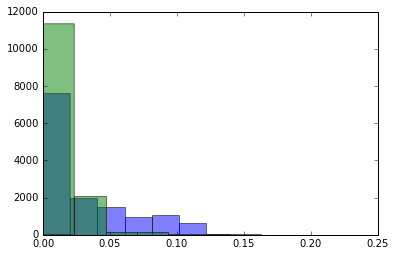

In [10]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [11]:
normed_m_feature_vec36, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec36)

In [12]:
normed_m_feature_vec12, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec12)

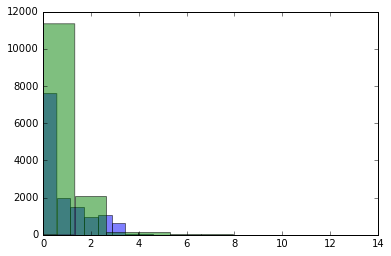

In [13]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 1], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec36, axis=2)[:, 10], alpha=0.5)

In [14]:
import TNN
reload(TNN)

Couldn't import dot_parser, loading of dot files will not be possible.


<module 'TNN' from 'TNN.pyc'>

In [17]:
n_hidden = 10
result = TNN.diag(normed_m_feature_vec36, m_GT_vec36,
                normed_m_feature_vec12, m_GT_vec12,
                n_hidden=n_hidden, h_activation="ReLU", out_activation="ReLU")

In [18]:
f_train, f_training_error, f_test_error, f_output, s_input, s_target, param2_list, a_list, bias_list = result

In [19]:
n_tensor = 12
param2_list[0].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[1].set_value(0.)
for i in range(n_hidden):
    a_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    bias_list[i].set_value(0.)

In [20]:
lr = 0.5 
reg2 = 0.
batch_size = 100
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 200
interval = 10
training_error_array = np.zeros((n_epochs // interval,))
test_error_array = np.zeros((n_epochs // interval,))

In [21]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)
        
    if i_epoch == 50:
        batch_size = 1000

    if i_epoch % interval == 0:
        training_error = f_training_error()[0]
        training_error_array[i_epoch // interval] = training_error
        test_error = f_test_error()[0]
        test_error_array[i_epoch // interval] = test_error
        print i_epoch, training_error, test_error

0 0.0088227631882 0.00876723423149
10 0.00810874338732 0.00805040396195
20 0.00771115579726 0.00765157539213
30 0.00673065699809 0.00666606814541
40 0.00514174574956 0.00506515177897
50 0.0039469044471 0.00385184323974
60 0.00386706488668 0.00377105727057
70 0.00381162671908 0.00371478683121
80 0.00376724121502 0.00366968191638
90 0.0037301023648 0.00363171589157
100 0.00369852171468 0.00359939153071
110 0.00367143304276 0.00357158275541
120 0.00364813288 0.00354774539658
130 0.00362793479144 0.00352682760601
140 0.00360993000525 0.00350816768515
150 0.00359424406599 0.0034921601162
160 0.00358075868056 0.00347807780325
170 0.00356833434371 0.00346520057775
180 0.00355740852799 0.00345393720756
190 0.00354823564245 0.00344465300934


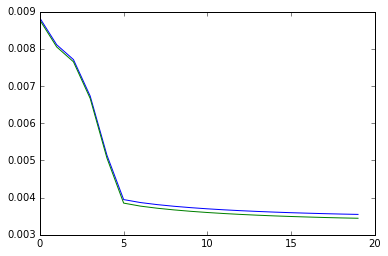

In [22]:
# V
plt.plot(training_error_array)
plt.plot(test_error_array)

In [23]:
import os
if not os.path.isdir("../results/diag_toytree12"):
    os.makedirs("../results/diag_toytree12")

with open("../results/diag_toytree12/training_error_array.npy", "w") as f:
    np.save(f, training_error_array)
with open("../results/diag_toytree12/test_error_array.npy", "w") as f:
    np.save(f, test_error_array)
gt2_vec = f_output(feature_vec_36[:, 12:24]/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape=(256, 256))
sio.savemat('../results/diag_toytree12/v_train.mat', {'v_train': gt1_img})

feature_vec_12 = TN_utils.load_featureImg_r(12)[:, 12:24]
gt2_vec_12 = f_output(feature_vec_12/norm_coef[:, np.newaxis])[0]
gt1_img_12 = TN_utils.convert_gt2vec_to_gt1img(gt2_vec_12, img_shape=(256, 256))
sio.savemat('../results/diag_toytree12/v_test.mat', {'v_test': gt1_img_12})

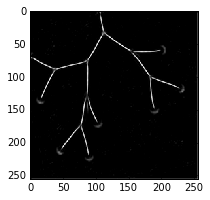

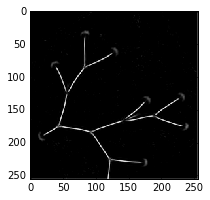

In [24]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img_12, axis=0).T)

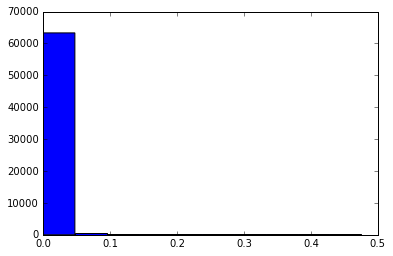

In [25]:
# V
gomi = plt.hist(np.linalg.norm(gt1_img, axis=0).flatten())